In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
dataset = pd.read_csv('Mall_Customers.csv')


In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
#dataset: Your DataFrame.
#.iloc: The method for selecting data by integer index.
#[rows:, 3:5columns]: This slice selects all rows (:) and columns from index 3 (inclusive) up to 5 (exclusive).
#.values: Converts the selected subset to a NumPy array.
X = dataset.iloc[:, 3:5].values

In [5]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html
#https://www.geeksforgeeks.org/affinity-propagation/?ref=ml_lbp
from sklearn.cluster import AffinityPropagation 
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

 
# Load the Mall Customer Segmentation dataset and drop any NaN values and irrelavent columns 
data = pd.read_csv('Mall_Customers.csv').dropna().drop('CustomerID', axis=1) 
# Select relevant features for clustering 
features = ['Annual Income (k$)', 'Spending Score (1-100)'] 
X = data[features] 
# Standardize the data 
scaler = StandardScaler() 
X_std = scaler.fit_transform(X)

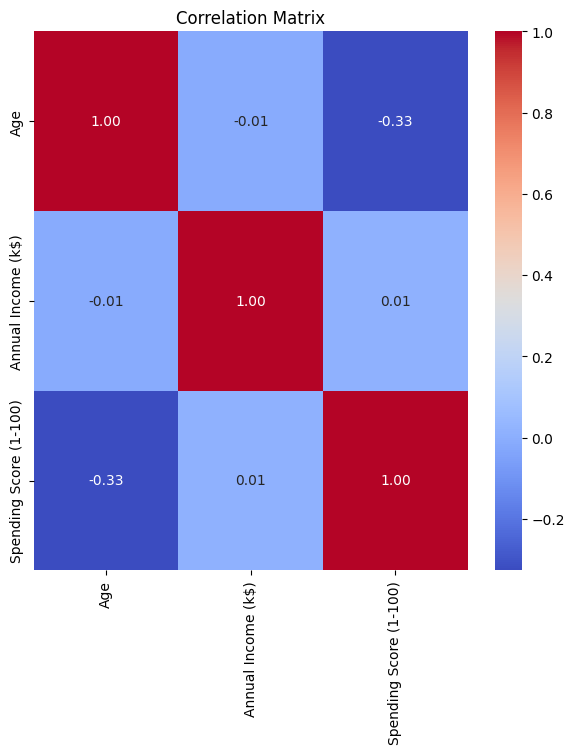

In [7]:
 
# EDA 1: Correlation Matrix 
correlation_matrix = data.corr(numeric_only=True) 
plt.figure(figsize=(7, 7)) 
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f") 
plt.title("Correlation Matrix") 
plt.show() 

C:\Anaconda3\envs\aiml\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Anaconda3\envs\aiml\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Anaconda3\envs\aiml\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Anaconda3\envs\aiml\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Anaconda3\envs\aiml\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Anaconda3\envs\aiml\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has b

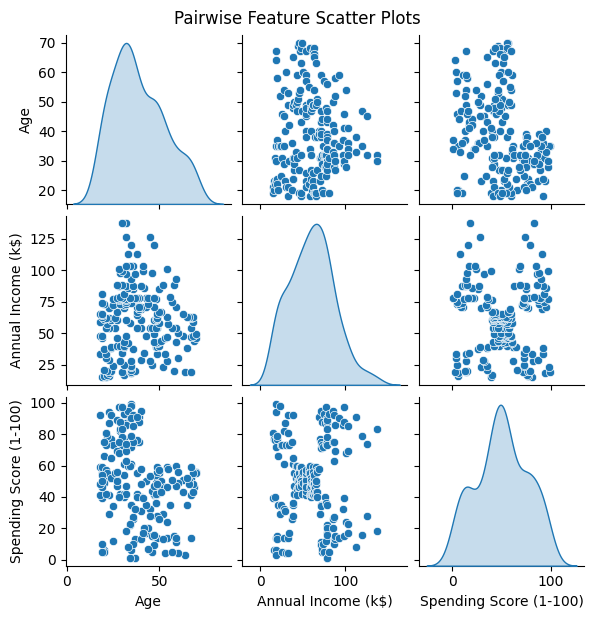

In [8]:
# EDA 2: Pairplot 
sns.pairplot(data, palette="Set1",  diag_kind="kde", height=2) 
plt.suptitle("Pairwise Feature Scatter Plots", y=1.02) 
plt.show()


C:\Anaconda3\envs\aiml\lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Anaconda3\envs\aiml\lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Anaconda3\envs\aiml\lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


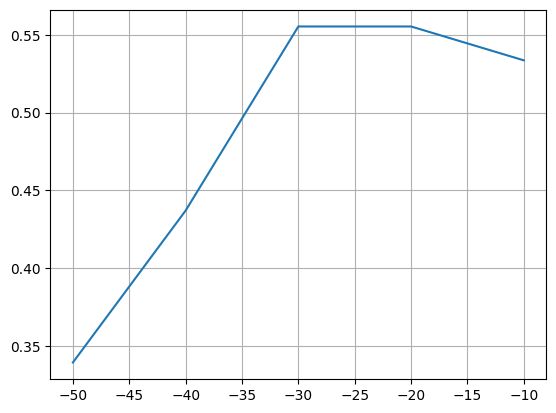

In [9]:
Preference = [-50, -40, -30,-20, -10] 
silhouette_scores = [] 
for preference in Preference: 
	model = AffinityPropagation(preference=preference, random_state=42) 
	model.fit(X_std) 
	
	silhouette_scores.append(metrics.silhouette_score(X_std , model.labels_)) 
silhouette_scores 

# Create line plot of `Preference` vs `silhouette_scores` 
plt.plot(Preference , silhouette_scores ) 
plt.grid() 
plt.show()


In [10]:
af = AffinityPropagation(preference= -30, max_iter=50, damping=0.7, random_state=42, convergence_iter=20).fit(X_std) 

# Predict cluster labels 
cluster_labels = af.labels_ 
cluster_labels


array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4])

In [11]:
silhouette_score = metrics.silhouette_score(X_std, cluster_labels) 
print(f"Silhouette Score: {silhouette_score}")


Silhouette Score: 0.5529643053885619


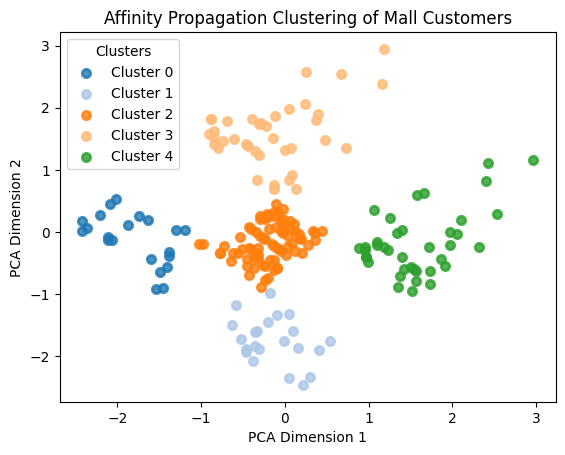

In [12]:
# Reduce dimensionality to 2D for visualization 
pca = PCA(n_components=2) 
X_r = pca.fit_transform(X_std) 

# Scatter plot the data points with different colors for each cluster 
unique_clusters = np.unique(cluster_labels) 
colors = plt.cm.tab20(unique_clusters) 
lw = 2

for cluster_id, color in zip(unique_clusters, colors): 
	plt.scatter(X_r[cluster_labels == cluster_id, 0], X_r[cluster_labels == cluster_id, 1], 
				color=color, alpha=0.8, lw=lw, label=f'Cluster {cluster_id}') 

plt.legend(loc='best', shadow=False, scatterpoints=1, title='Clusters') 
plt.title('Affinity Propagation Clustering of Mall Customers') 
plt.xlabel('PCA Dimension 1') 
plt.ylabel('PCA Dimension 2') 

plt.show()
